In [1]:
# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer,QuantileTransformer,PowerTransformer

# step 1. 데이터 준비
dataset = fetch_california_housing()
housing = pd.DataFrame(dataset.data[:,[0,4,6]] , columns=[dataset.feature_names[0], \
                                                         dataset.feature_names[4],  \
                                                         dataset.feature_names[6]] )
housing['Target'] = dataset.target
housing

,MedInc,Population,Latitude,Target
0,8.325,322.000,37.880,4.526
1,8.301,2401.000,37.860,3.585
2,7.257,496.000,37.850,3.521
3,5.643,558.000,37.850,3.413
4,3.846,565.000,37.850,3.422
...,...,...,...,...
20635,1.560,845.000,39.480,0.781
20636,2.557,356.000,39.490,0.771
20637,1.700,1007.000,39.430,0.923
20638,1.867,741.000,39.430,0.847


In [3]:
#2) 통계정보  
housing.describe()

,MedInc,Population,Latitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,35.631861,2.068558
std,1.899822,1132.462122,2.135952,1.153956
min,0.499900,3.000000,32.540000,0.149990
25%,2.563400,787.000000,33.930000,1.196000
50%,3.534800,1166.000000,34.260000,1.797000
75%,4.743250,1725.000000,37.710000,2.647250
max,15.000100,35682.000000,41.950000,5.000010


In [4]:
#3) 데이터 타입 정보  
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   Population  20640 non-null  float64
 2   Latitude    20640 non-null  float64
 3   Target      20640 non-null  float64
dtypes: float64(4)
memory usage: 645.1 KB


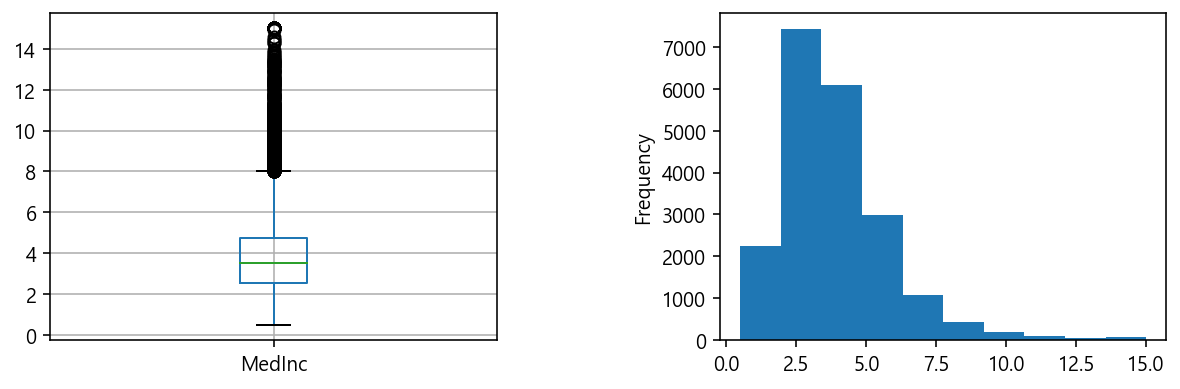

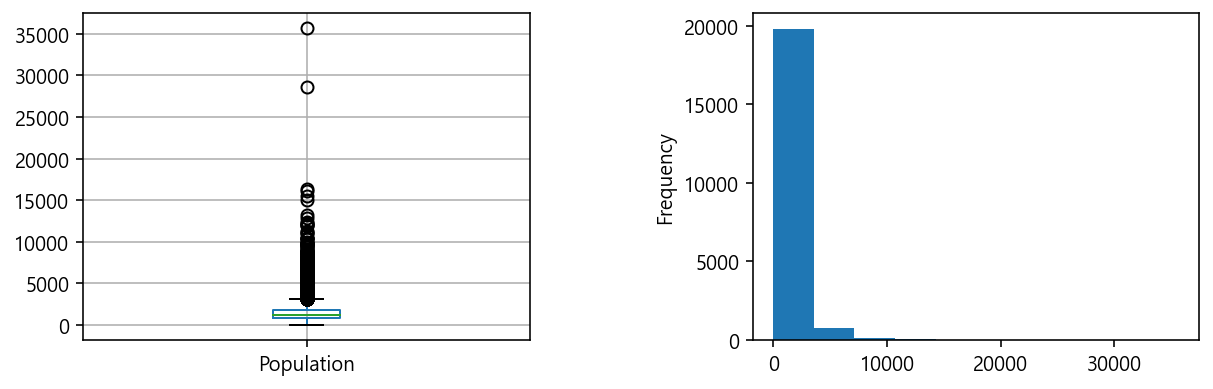

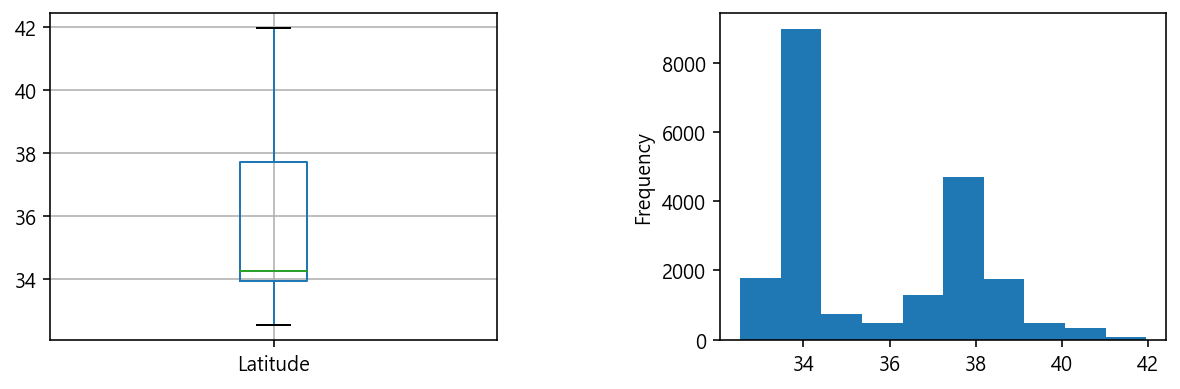

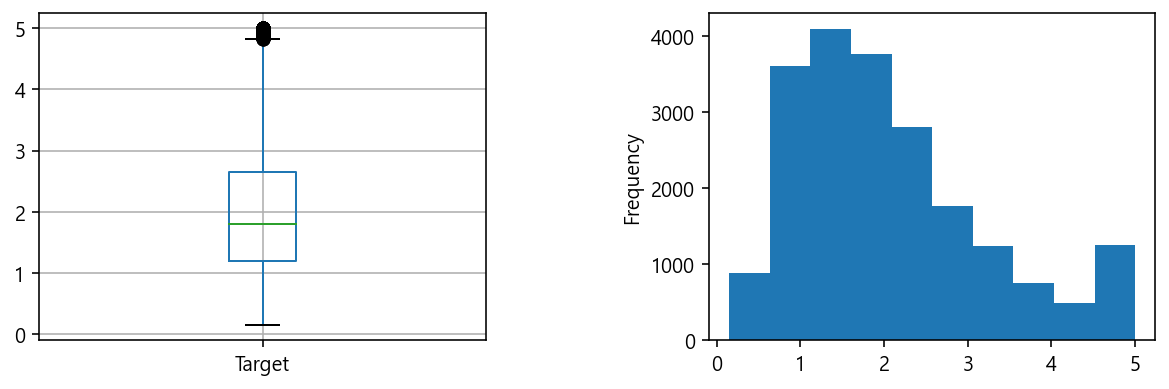

In [19]:
#4)시각화 확인 
def my_graphs(column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    fig.subplots_adjust(wspace=0.5, hspace=0.5) # 그래프 간의 간격 

    housing.boxplot(ax=axes[0], column=[column]);
    housing[column].plot.hist(ax=axes[1]);
    plt.show()    
   
_=[my_graphs(column_name) for column_name in housing]

In [16]:
#5) 스케일링 작업 메소드  

# 스케일링 작업된 그래프 결과 
# 1열  박스 Scale 전  
# 2열  박스 Scale 후  
#3열   히스토그램 Scale 전 
#4열  히스토그램 Scale 후 
def my_with_scale(column, housing_scaled):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

      #표준화 하기 전  
    housing.boxplot(ax=axes[0], column=[column])
    housing[column].plot.hist(ax=axes[2])
    
      #표준화 이후  
    housing_scaled.boxplot(ax=axes[1], column=[column])
    housing_scaled[column].plot.hist(ax=axes[3])
    plt.show()
    
# 스케일링 작업  +  상관계수  + 통계량  
def my_scaled(scaler):
    housing_scaled = housing.copy()  # 원본 데이터  
    housing_scaled.iloc[:, 0:3] = scaler.fit_transform(housing.iloc[:, 0:3])#표준화  
    
    #그래프 그리는 함수 호출
    _ = [my_with_scale(column_name, housing_scaled) for column_name in housing.iloc[:, 0:3]]
    
    display(housing.corr().style.background_gradient(axis=None)) #일반
    display(housing_scaled.corr().style.background_gradient(axis=None)) #스케일링 작업  
    print(housing_scaled.iloc[:, 0:3].describe())  # 통계량  

pd.options.display.float_format = '{:.3f}'.format  # 상관계수 자리 표시  

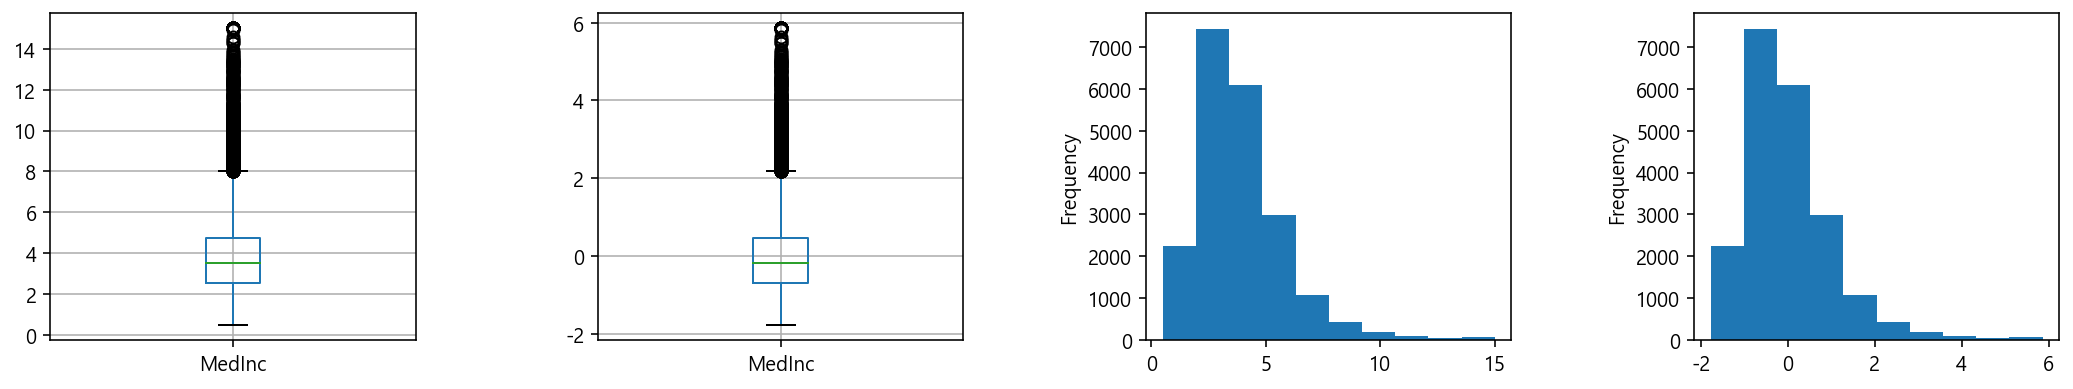

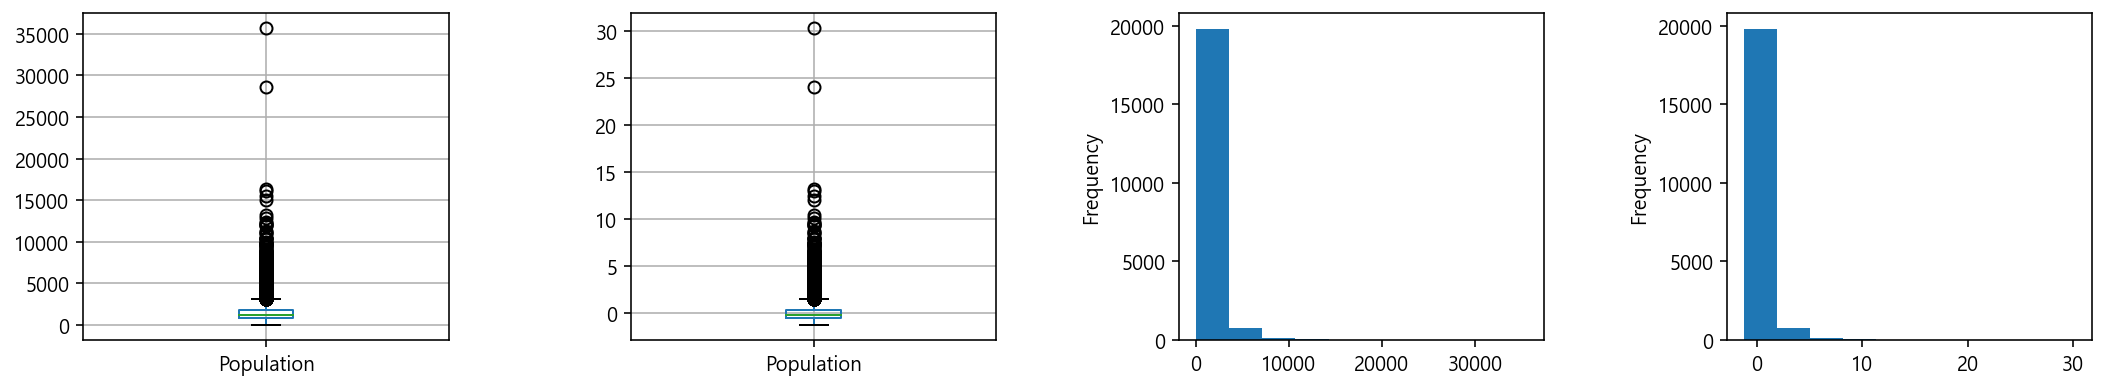

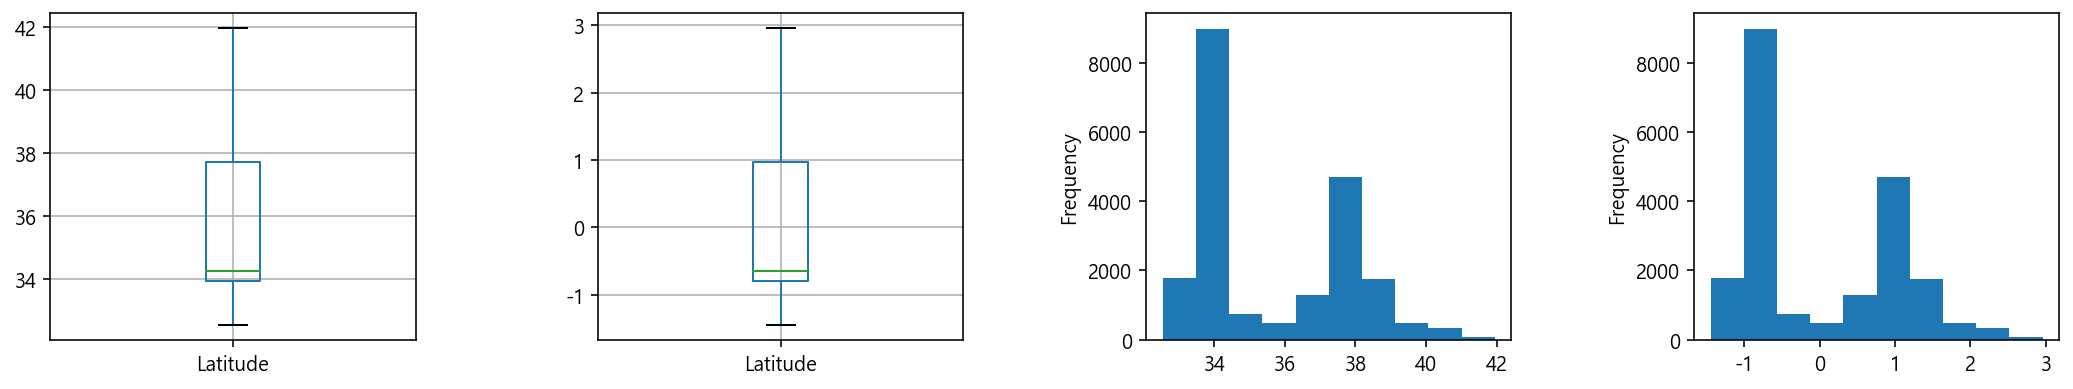

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.000      -0.000     0.000
std       1.000       1.000     1.000
min      -1.774      -1.256    -1.448
25%      -0.688      -0.564    -0.797
50%      -0.177      -0.229    -0.642
75%       0.459       0.264     0.973
max       5.858      30.250     2.958


In [17]:
my_scaled(StandardScaler())  # 표준화 객체를 생성해서 대입  
#[결과확인]  : 그래프를 보면 평균값이  0으로 만든것은 알겠다.  
             # 선형변환 -> 분포의 형태 자체는 변하지 않는다.  
    #https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
    
# -> Population  은 이상치의 영향을 강하게 받기 때문에 StandardScaler에서는 제거할 수 없다. 
#    왜? -> 최대치가 그대로 남아있기 때문에 히스토그램을 보게 되면 오른쪽에 아무것도 없는 부분이 보인다.

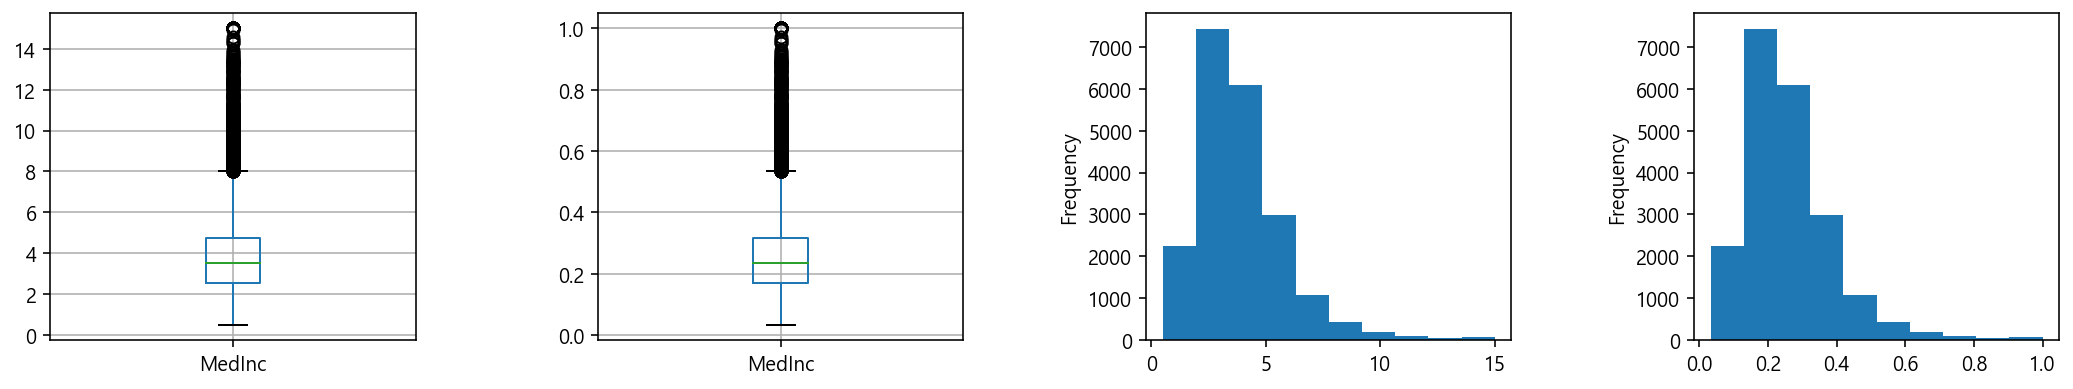

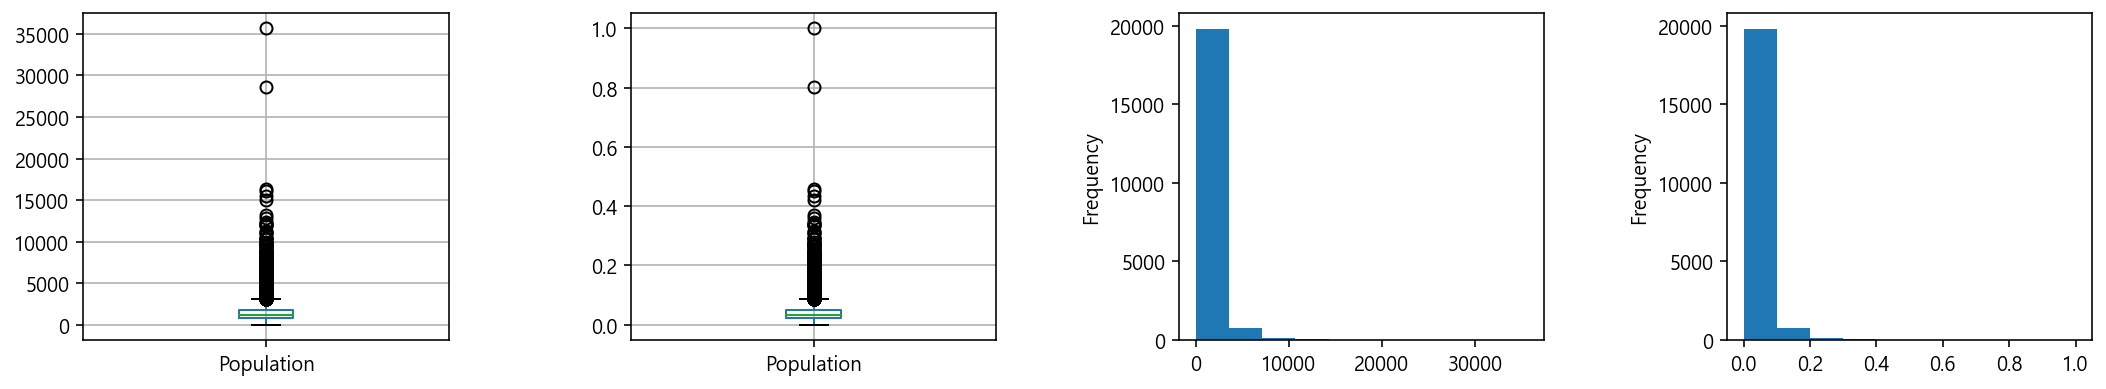

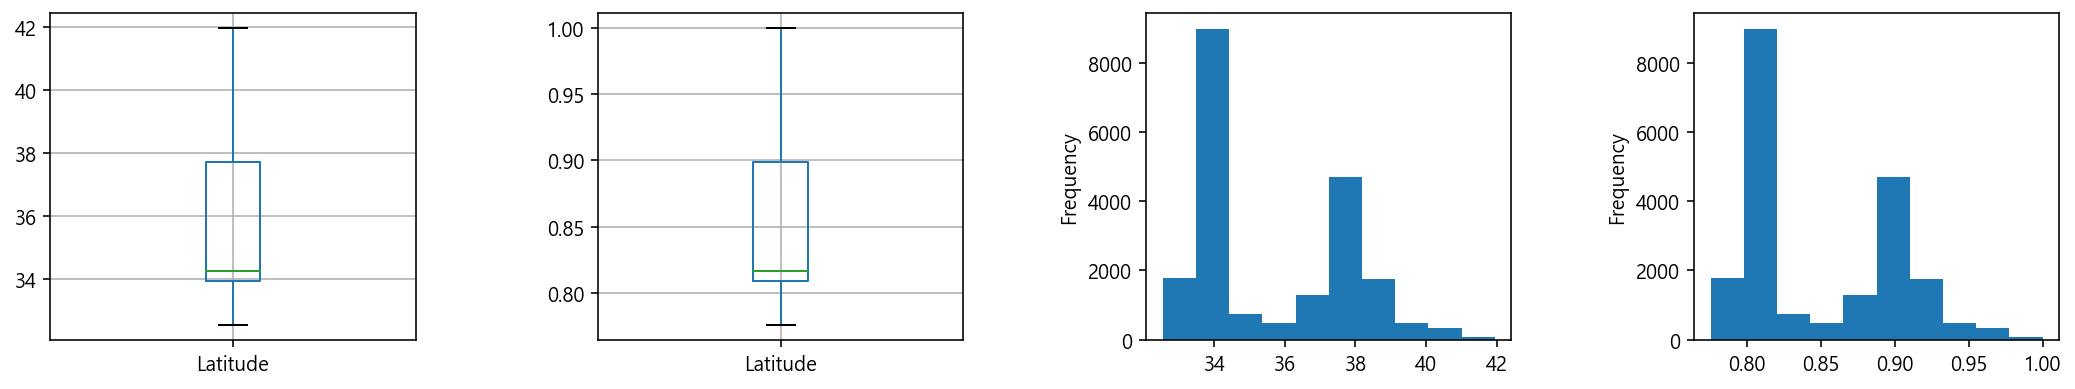

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.258       0.040     0.849
std       0.127       0.032     0.051
min       0.033       0.000     0.776
25%       0.171       0.022     0.809
50%       0.236       0.033     0.817
75%       0.316       0.048     0.899
max       1.000       1.000     1.000


In [20]:
#6) 정규화 작업 들어가자.  : 비선형 변환에도 강하다.  
my_scaled(MaxAbsScaler()) #절대값의 최대값으로 나눗셈  -1 ~ 1-> 0~ 1로 스케일링이 된다.   x / max|x|

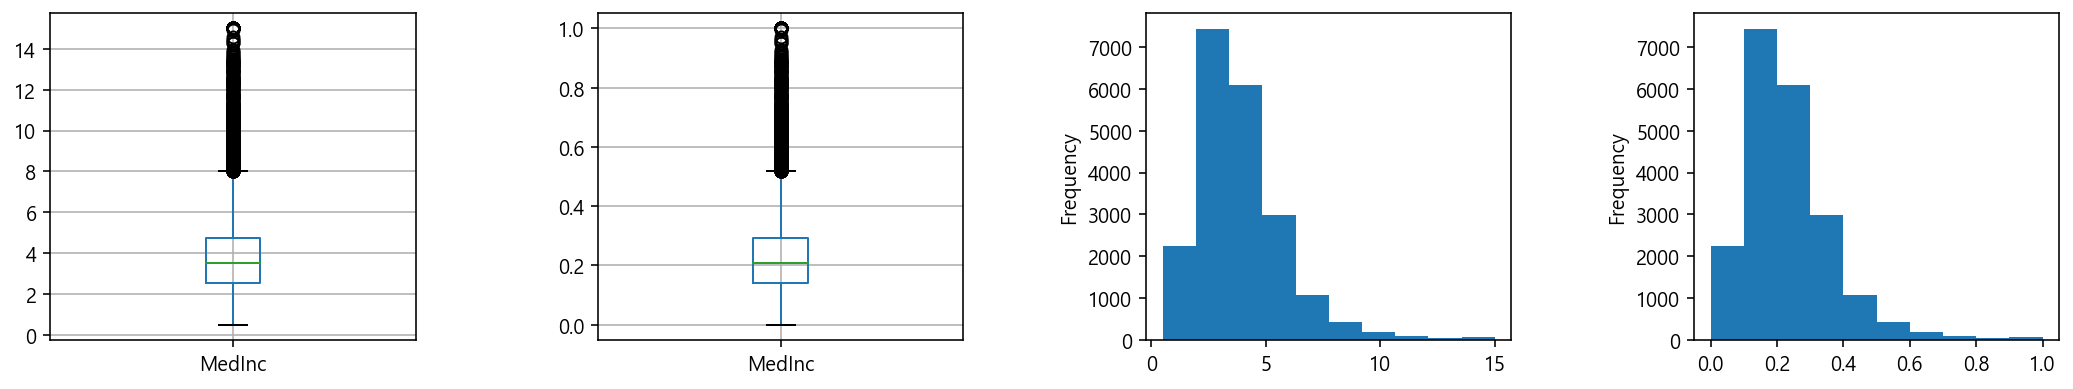

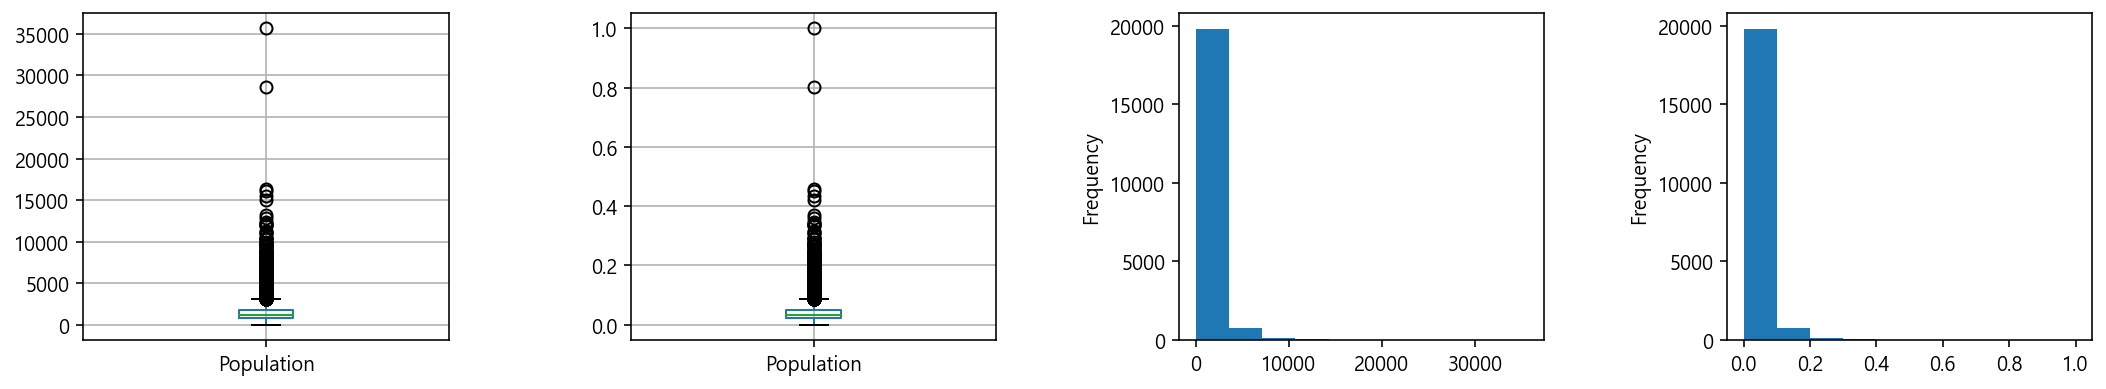

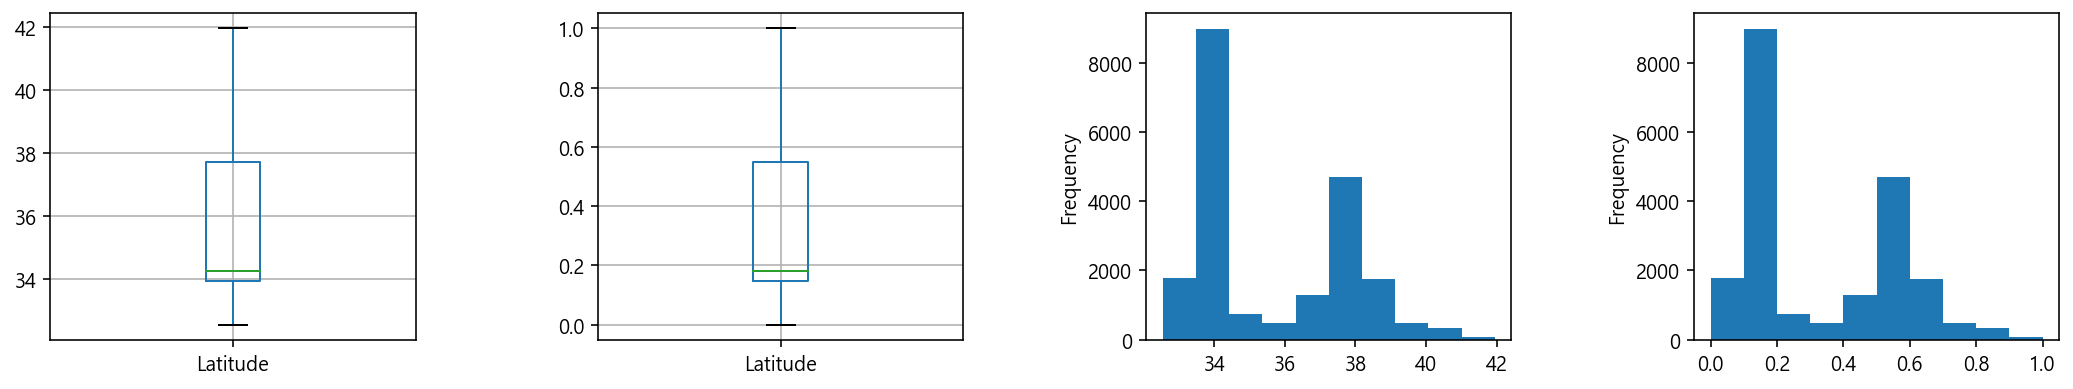

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.232       0.040     0.329
std       0.131       0.032     0.227
min       0.000       0.000     0.000
25%       0.142       0.022     0.148
50%       0.209       0.033     0.183
75%       0.293       0.048     0.549
max       1.000       1.000     1.000


In [21]:
#7) 정규화 작업 들어가자.  : 비선형 변환에도 강하다.  
my_scaled(MinMaxScaler()) #최소값과 최대값 -> 0 ~ 1-> 0~ 1로 스케일링이 된다.  

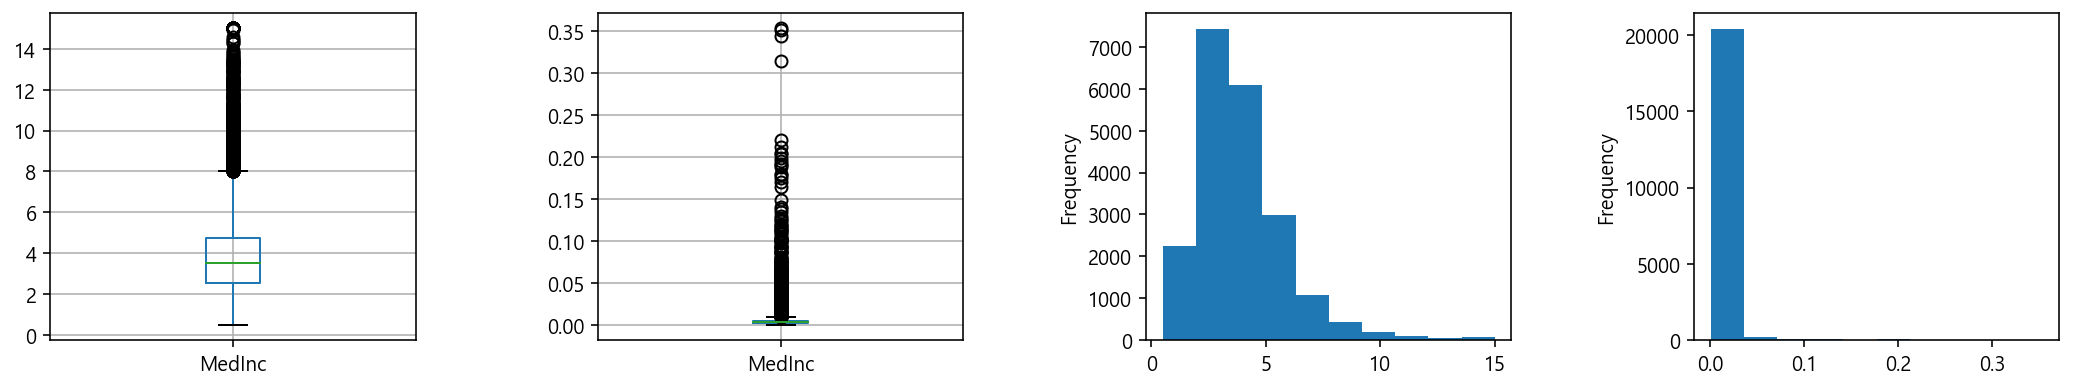

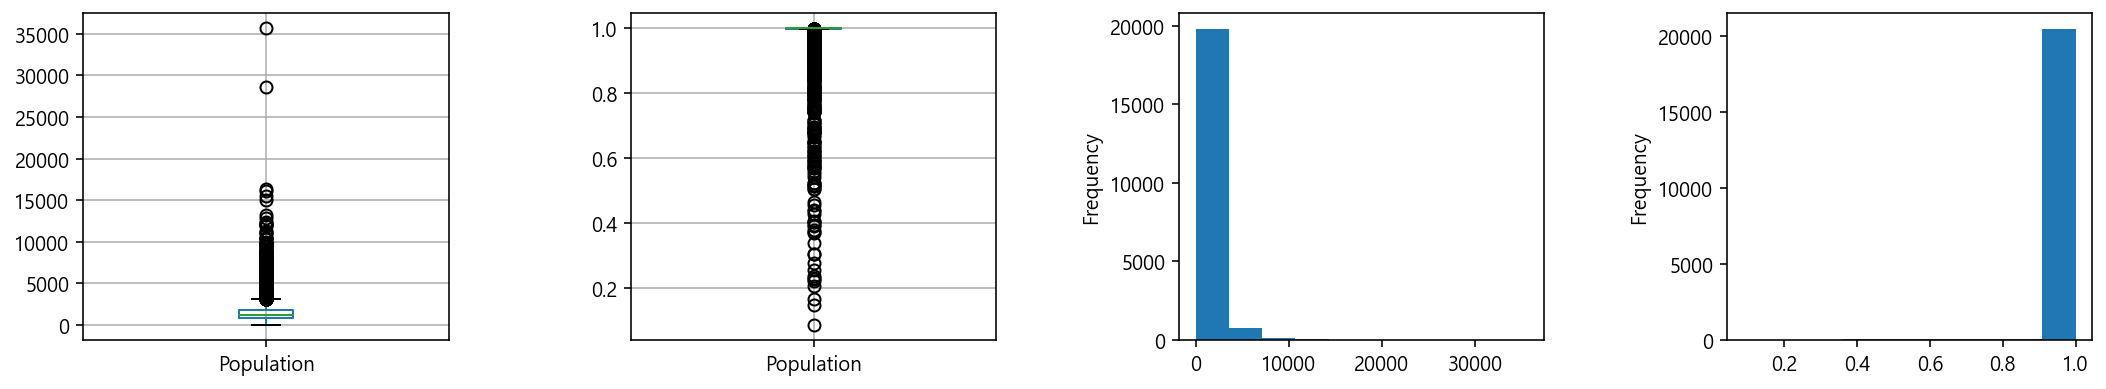

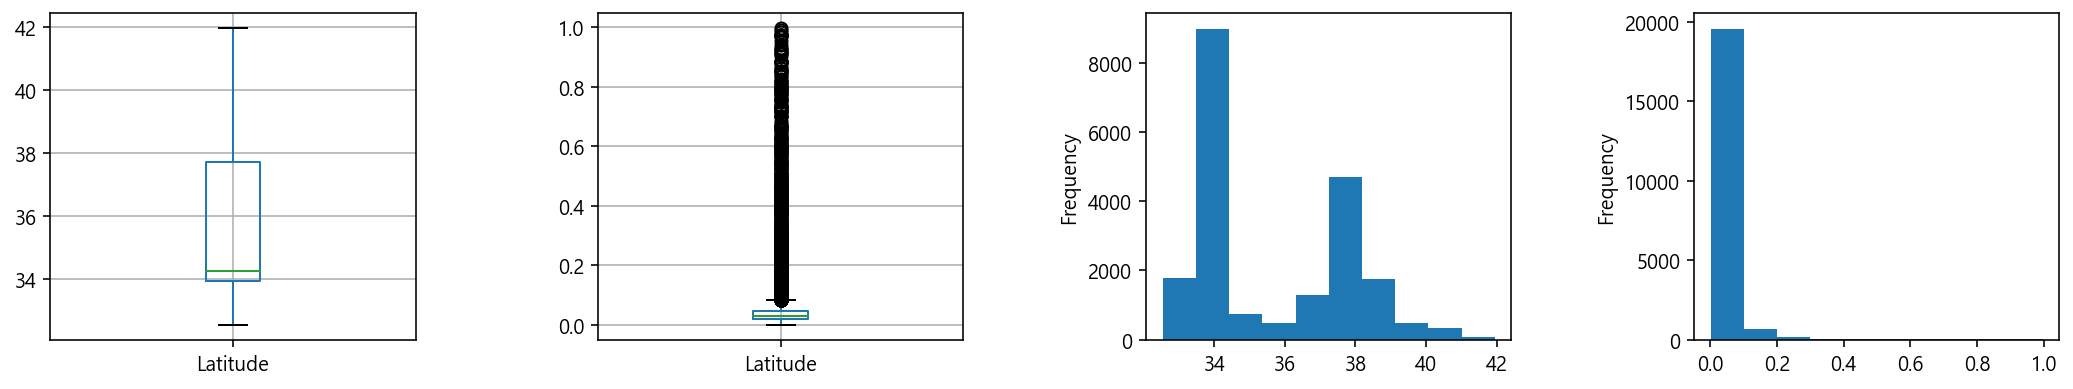

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,-0.640842,0.738237,0.184269
Population,-0.640842,1.000000,-0.865944,0.002580
Latitude,0.738237,-0.865944,1.000000,-0.009623
Target,0.184269,0.002580,-0.009623,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.005       0.996     0.045
std       0.010       0.033     0.071
min       0.000       0.088     0.001
25%       0.002       0.999     0.020
50%       0.003       1.000     0.030
75%       0.005       1.000     0.046
max       0.354       1.000     0.996


In [24]:
#8) 정규화 작업 들어가자.  : 비선형 변환에도 강하다.  
my_scaled(Normalizer()) #L1/ L2표준으로 정규화   -1 ~ 1
#특징량  /  sqrt(medinc^2 + Population^2 + Latitude^2)  -> L2계산  

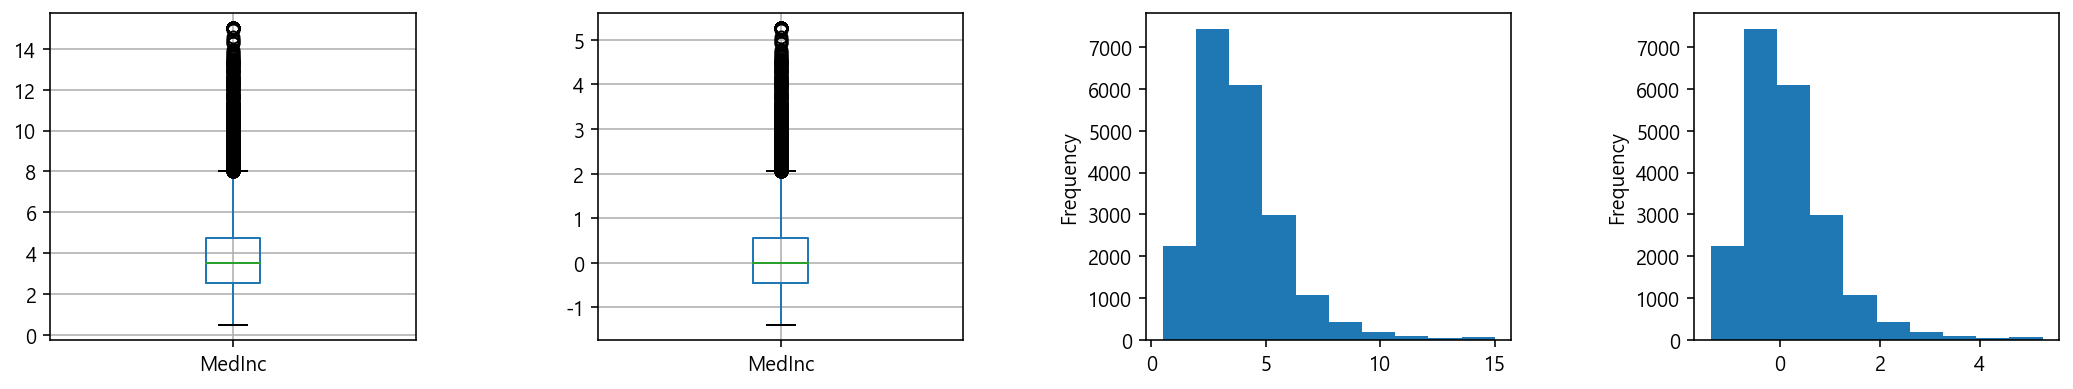

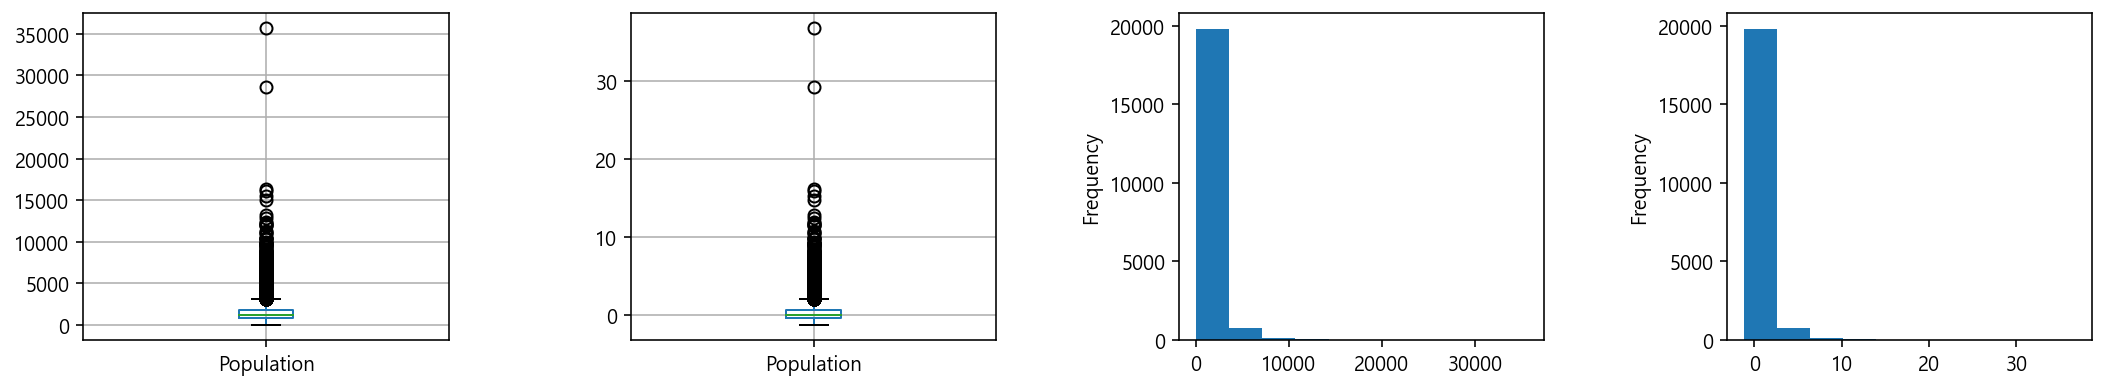

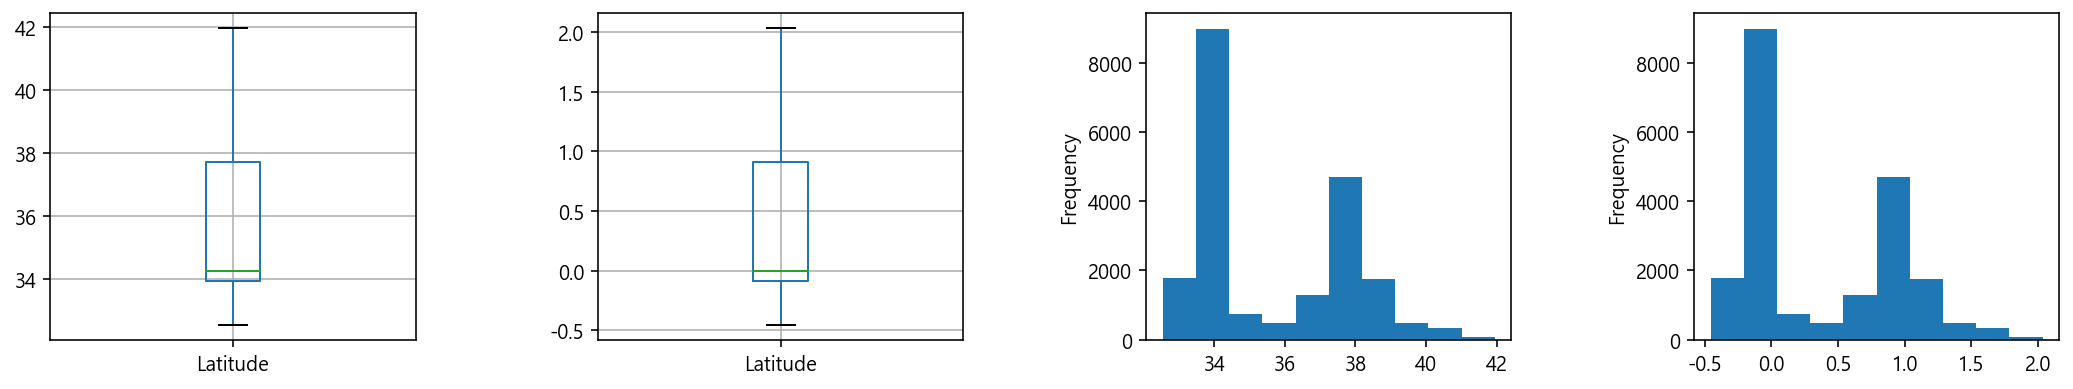

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.154       0.277     0.363
std       0.872       1.207     0.565
min      -1.392      -1.240    -0.455
25%      -0.446      -0.404    -0.087
50%       0.000       0.000     0.000
75%       0.554       0.596     0.913
max       5.260      36.797     2.034


In [25]:
#8) 정규화 작업 들어가자.  : 비선형 변환에도 강하다.  
my_scaled(RobustScaler())  
# 이상치에 강한  스케일링  중앙값을  0(기본통계량의 50%)으로 잡고 25% 75%의 백분위 값의 차이를 나눈다

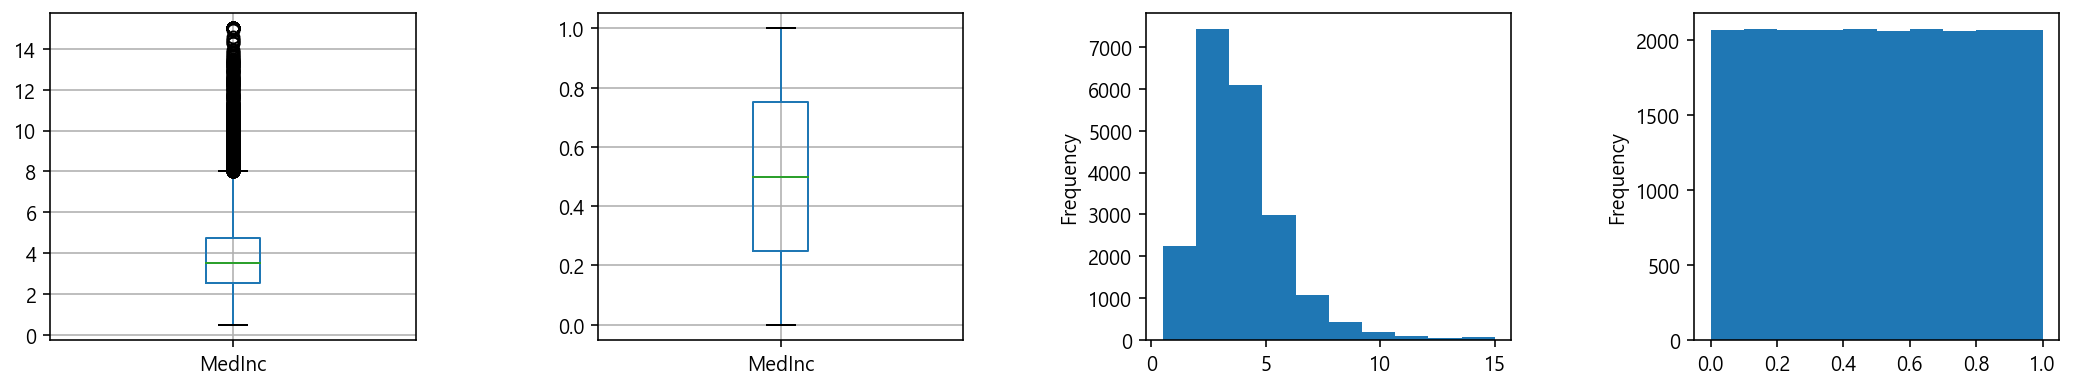

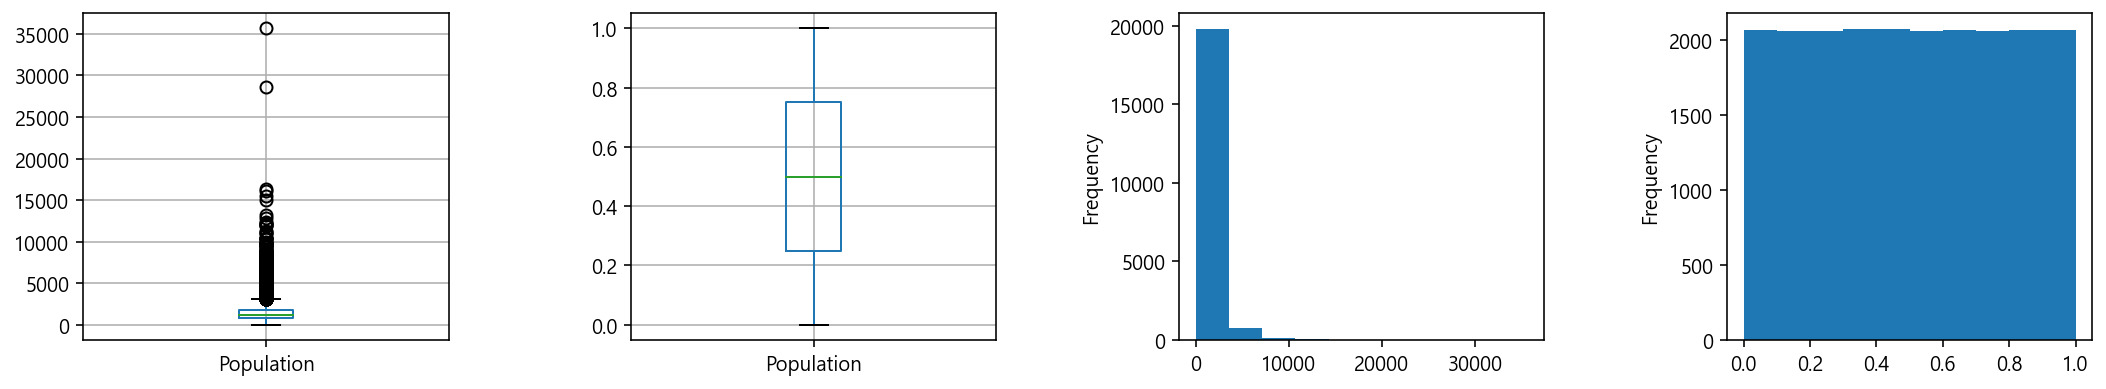

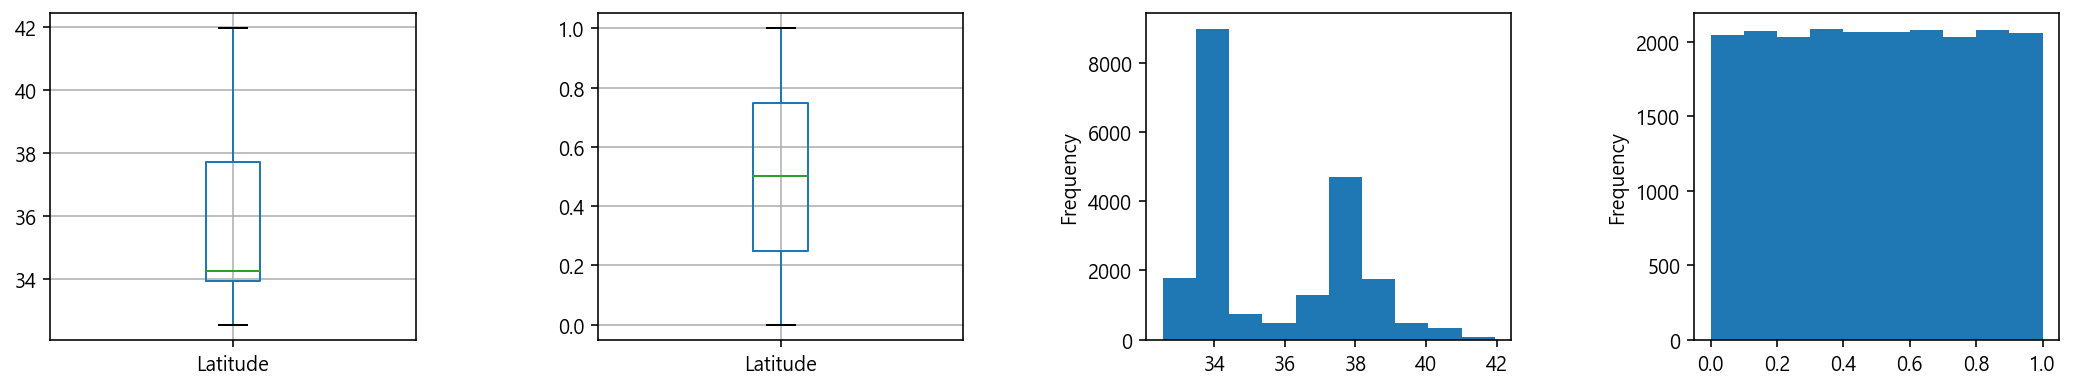

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.006259,-0.088025,0.644026
Population,0.006259,1.000000,-0.123627,-0.038350
Latitude,-0.088025,-0.123627,1.000000,-0.129843
Target,0.644026,-0.038350,-0.129843,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.500       0.500     0.500
std       0.289       0.289     0.289
min       0.000       0.000     0.000
25%       0.250       0.250     0.247
50%       0.500       0.500     0.502
75%       0.750       0.750     0.749
max       1.000       1.000     1.000


In [28]:
#9)  비선형 변환 작업 _분위.  : 비선형 변환에도 강하다.  
my_scaled(QuantileTransformer(output_distribution='uniform'))
#값의 크기에 대소에 따라서 순위를 매겨 0~1범위로 순서대로 스켈링 작업

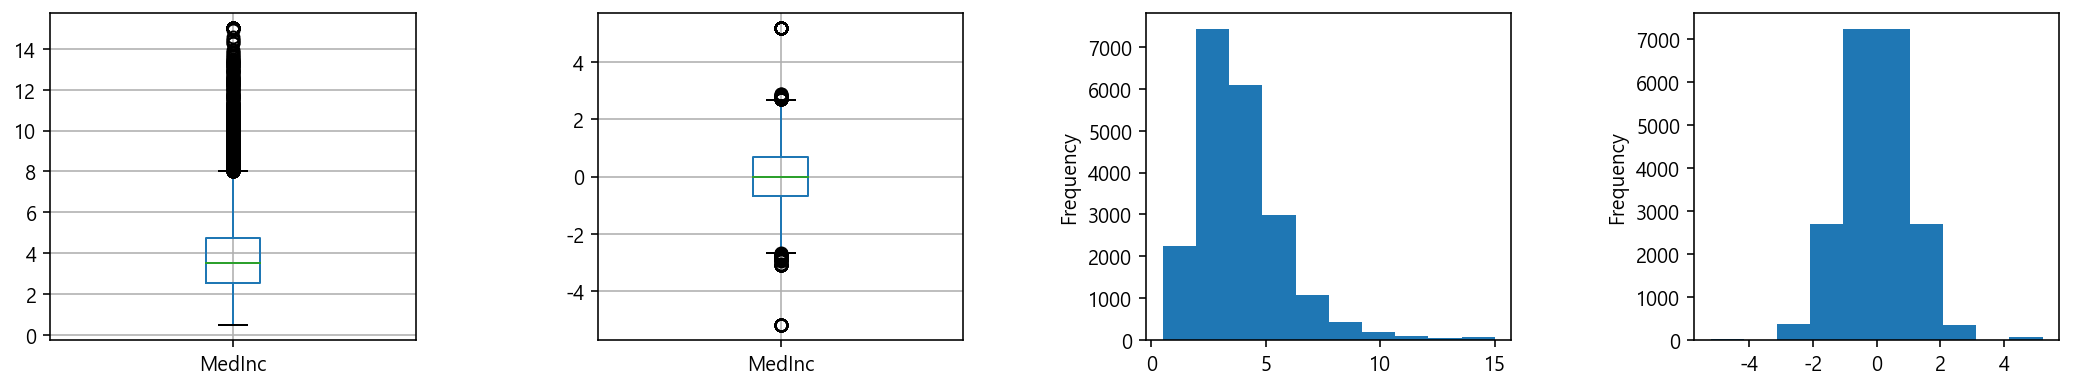

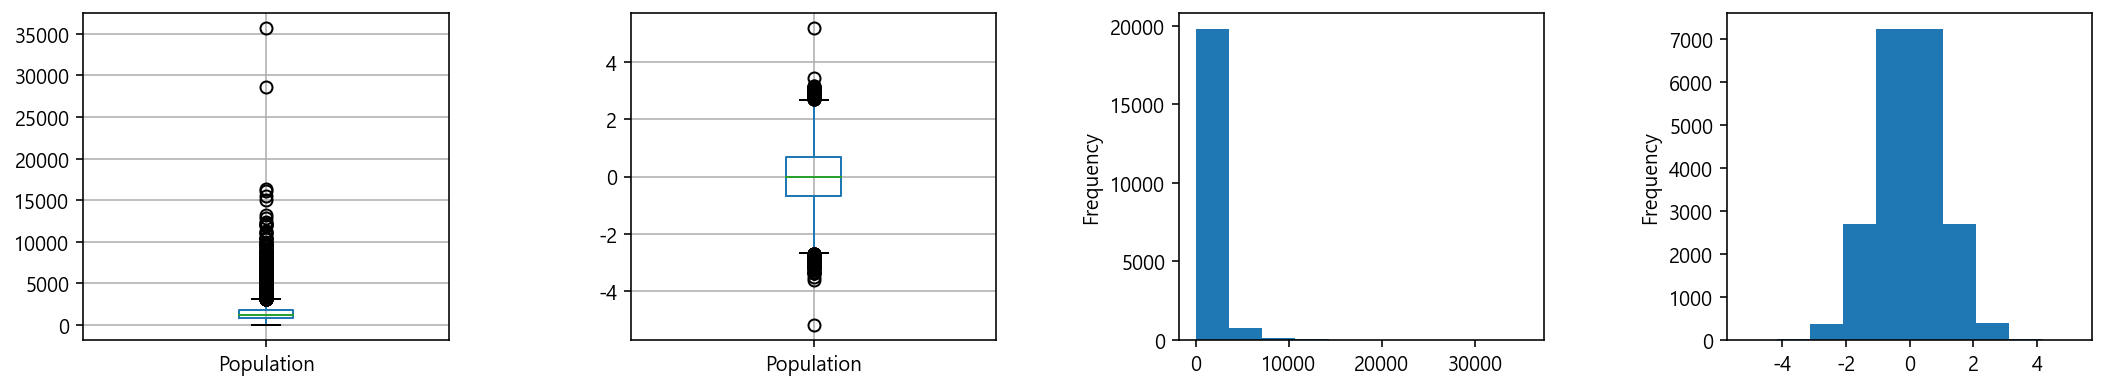

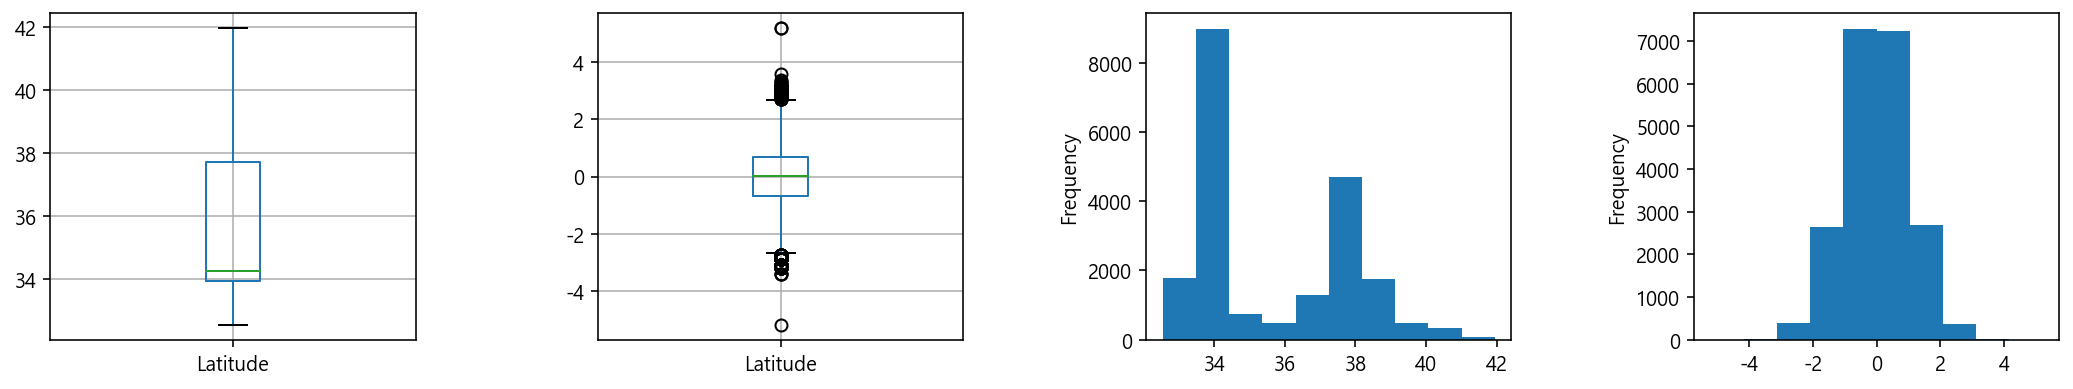

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.022967,-0.096496,0.656321
Population,0.022967,1.000000,-0.123316,-0.030904
Latitude,-0.096496,-0.123316,1.000000,-0.141837
Target,0.656321,-0.030904,-0.141837,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.004      -0.000     0.000
std       1.024       1.000     1.001
min      -5.199      -5.199    -5.199
25%      -0.675      -0.675    -0.683
50%      -0.000      -0.000     0.004
75%       0.674       0.675     0.671
max       5.199       5.199     5.199


In [29]:
#10)  비선형 변환 작업 _분위 QuantileTransformer로 가우스분포 표시  : 비선형 변환에도 강하다.  
my_scaled(QuantileTransformer(output_distribution='normal'))
#값의 크기에 대소에 따라서 순위를 매겨 순서대로 스켈링 작업, 가우스분포p 에 스케일링 작업을 한다. 

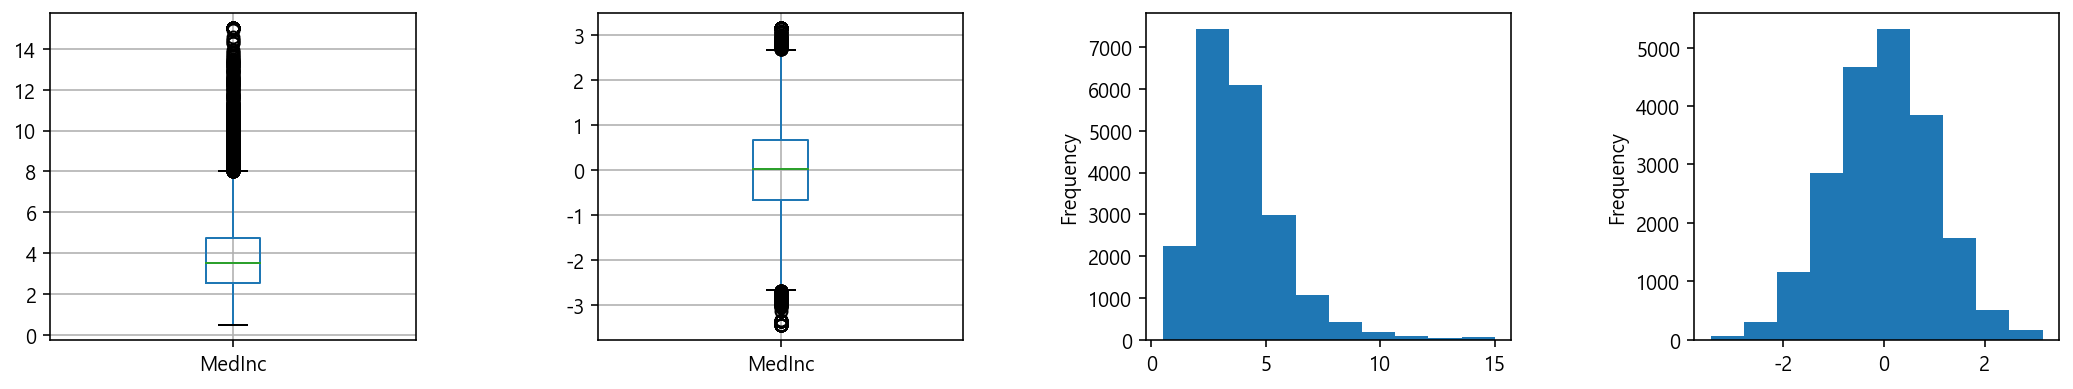

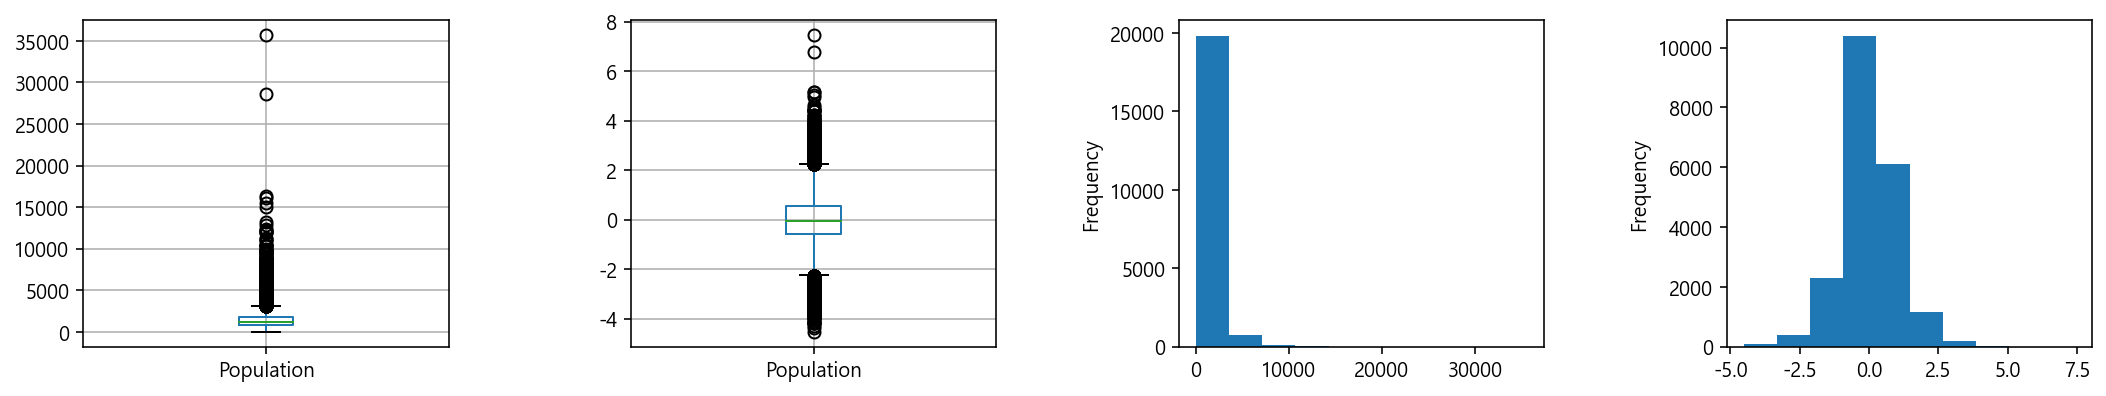

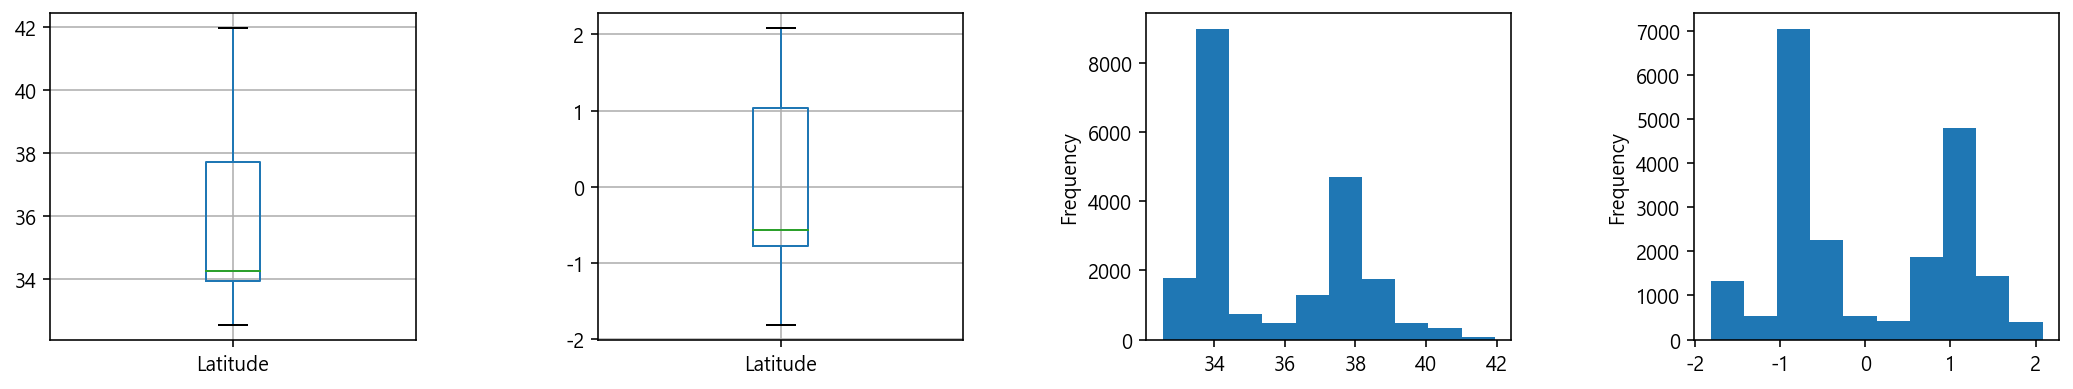

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.034334,-0.070663,0.659644
Population,0.034334,1.000000,-0.130030,-0.025152
Latitude,-0.070663,-0.130030,1.000000,-0.122682
Target,0.659644,-0.025152,-0.122682,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.000       0.000    -0.000
std       1.000       1.000     1.000
min      -3.446      -4.529    -1.816
25%      -0.671      -0.570    -0.776
50%       0.021      -0.034    -0.566
75%       0.668       0.552     1.032
max       3.147       7.451     2.082


In [32]:
#11)  비선형 변환 작업 _분위 PowerTransformer 가우스분포 표시를 가장 잘한다 : 비선형 변환에도 강하다.
#이상치를 부드럽게 가우스분포로 완하 시켜준다.  
my_scaled(PowerTransformer('yeo-johnson'))
#값의 크기에 대소에 따라서 순위를 매겨 순서대로 스켈링 작업, 가우스분포p 에 스케일링 작업을 한다. 

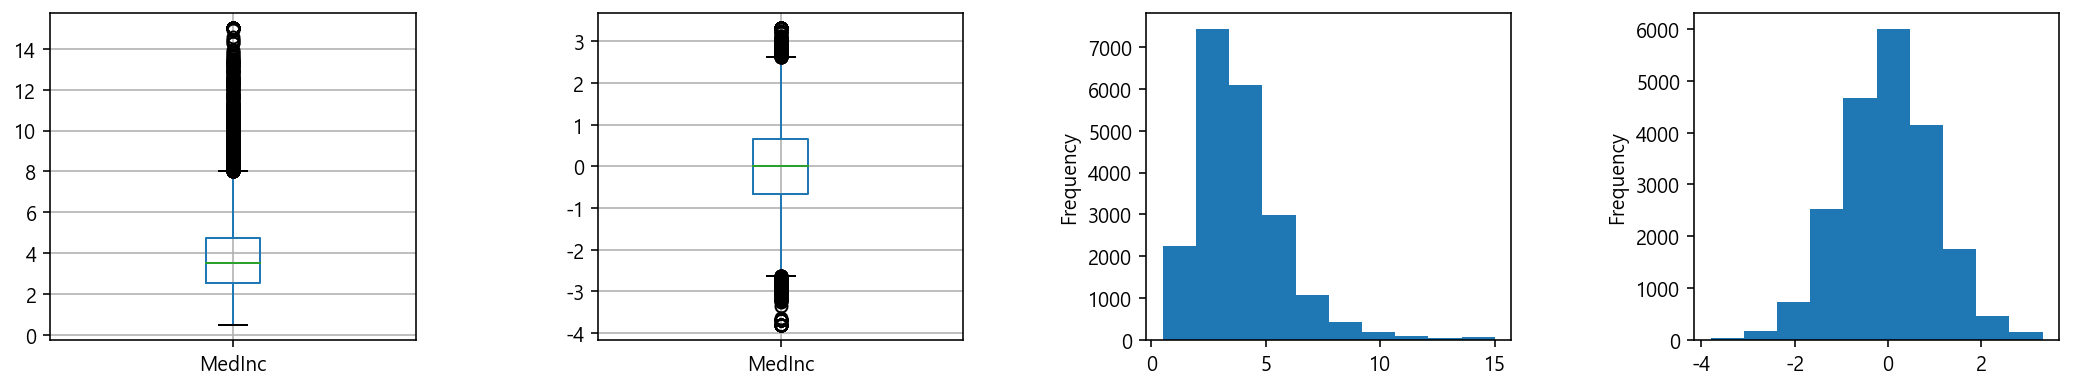

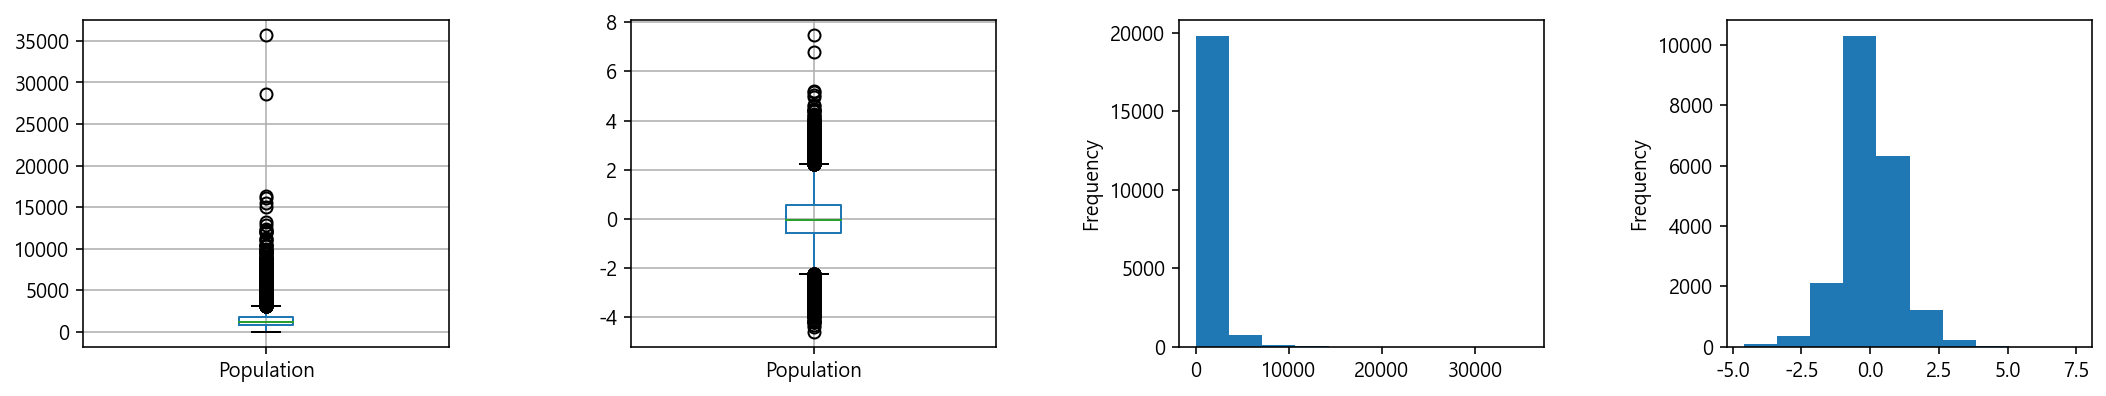

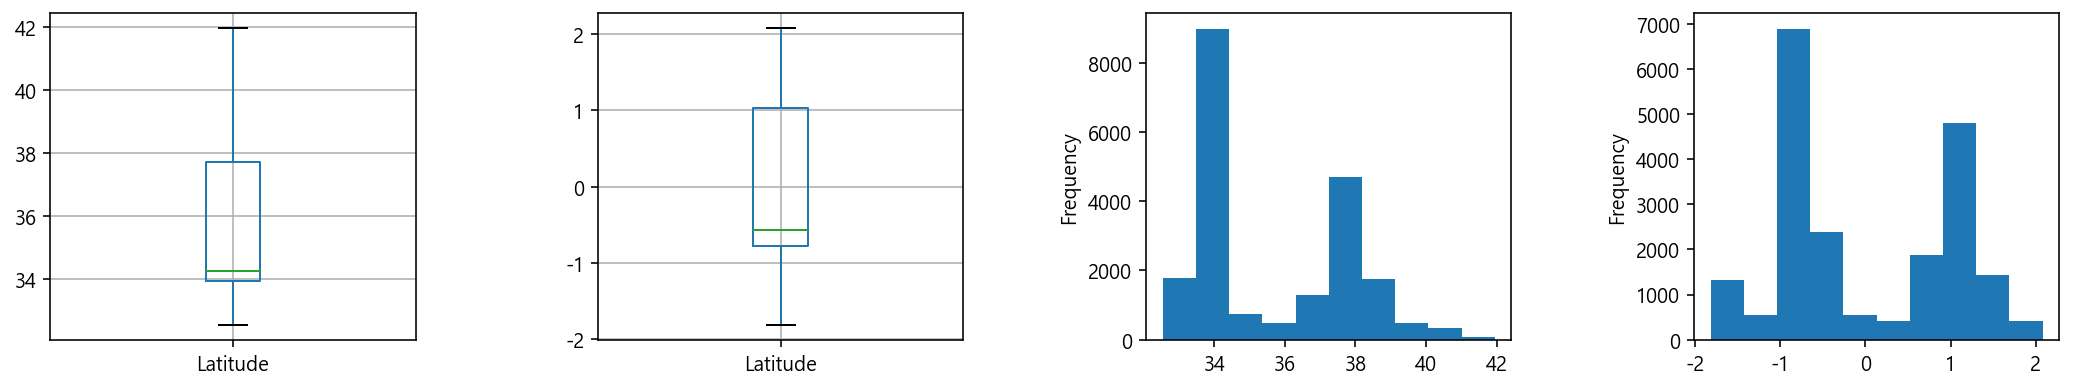

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.035052,-0.070356,0.659298
Population,0.035052,1.000000,-0.129958,-0.025156
Latitude,-0.070356,-0.129958,1.000000,-0.122652
Target,0.659298,-0.025156,-0.122652,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean     -0.000       0.000     0.000
std       1.000       1.000     1.000
min      -3.803      -4.604    -1.817
25%      -0.658      -0.570    -0.776
50%       0.017      -0.034    -0.566
75%       0.653       0.552     1.032
max       3.310       7.475     2.081


In [33]:
#12)  비선형 변환 작업 _분위 PowerTransformer 가우스분포 표시를 가장 잘한다 : 비선형 변환에도 강하다.
#이상치를 부드럽게 가우스분포로 완하 시켜준다.  
my_scaled(PowerTransformer('box-cox'))
#값의 크기에 대소에 따라서 순위를 매겨 순서대로 스켈링 작업, 가우스분포p 에 스케일링 작업을 한다. 

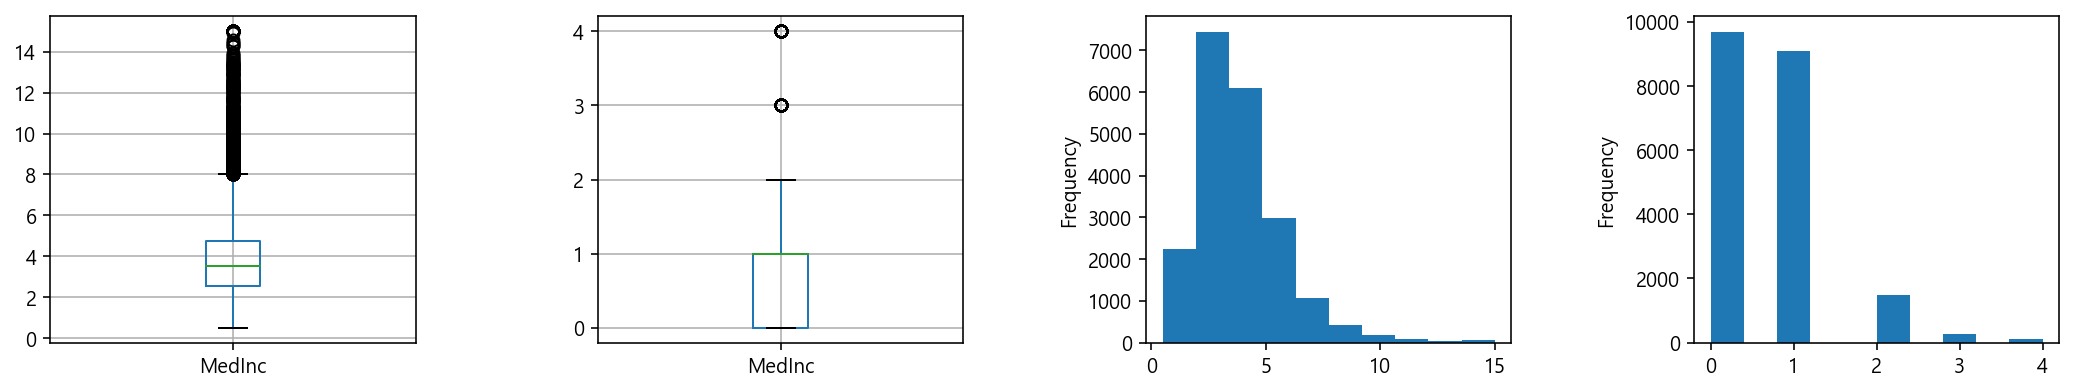

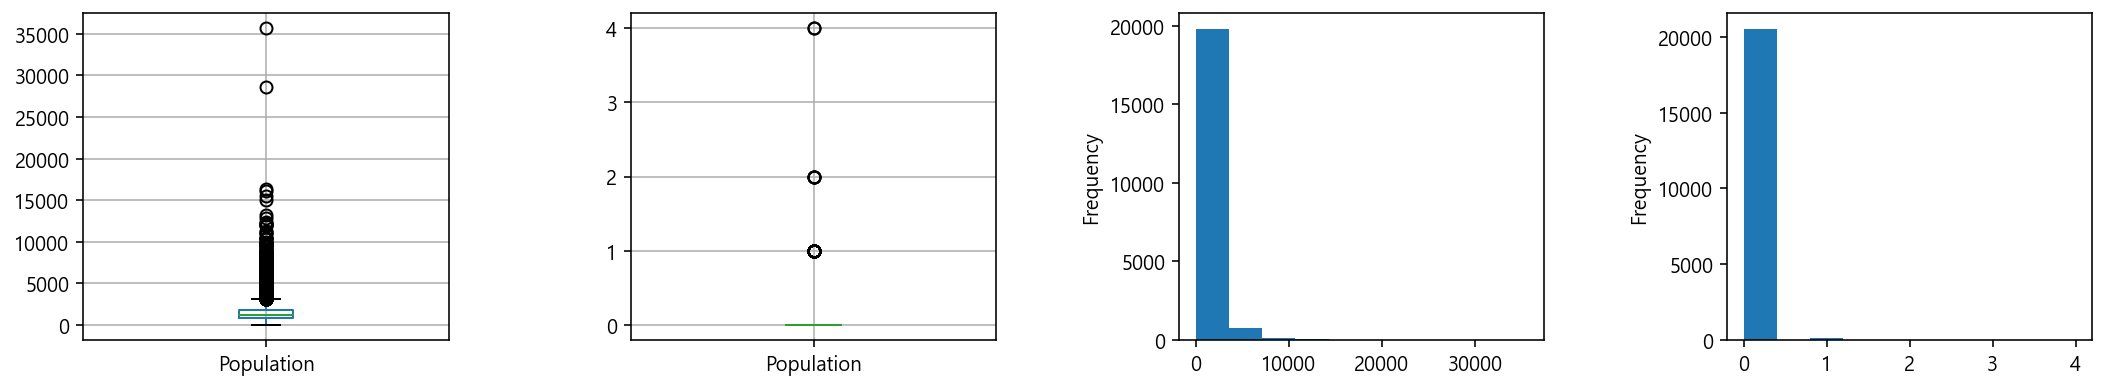

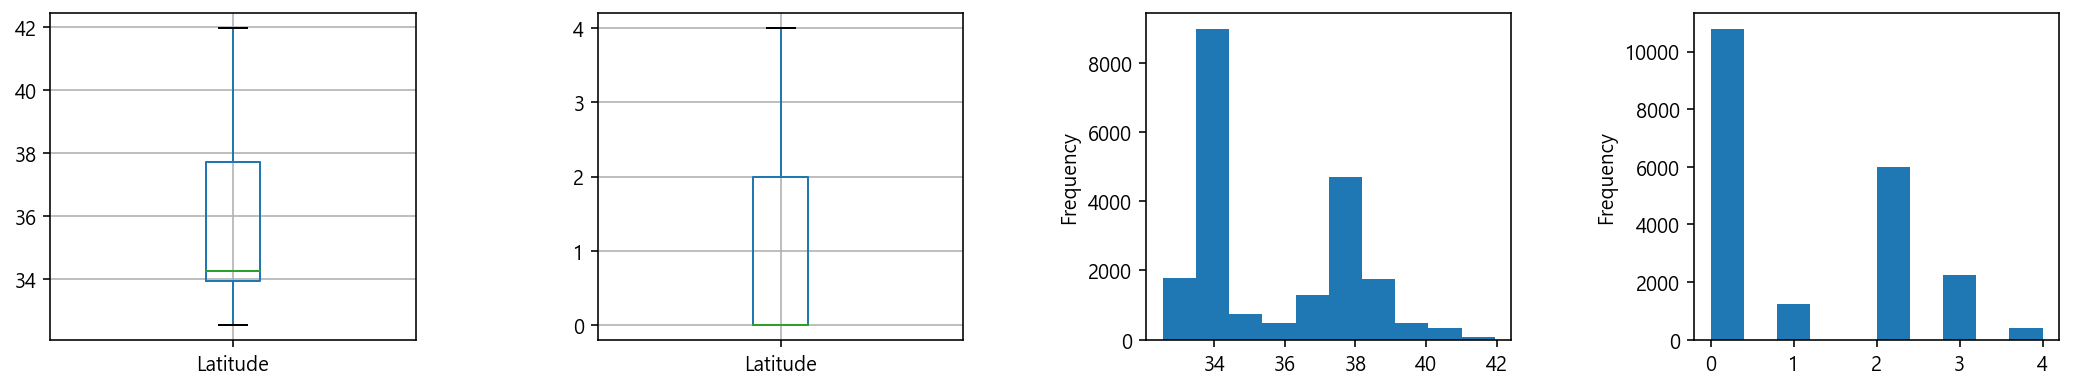

,MedInc,Population,Latitude,Target
MedInc,1.000000,0.004834,-0.079809,0.688075
Population,0.004834,1.000000,-0.108785,-0.024650
Latitude,-0.079809,-0.108785,1.000000,-0.144160
Target,0.688075,-0.024650,-0.144160,1.000000


,MedInc,Population,Latitude,Target
MedInc,1.000000,0.022347,-0.089777,0.640564
Population,0.022347,1.000000,-0.011896,0.004858
Latitude,-0.089777,-0.011896,1.000000,-0.179377
Target,0.640564,0.004858,-0.179377,1.000000


         MedInc  Population  Latitude
count 20640.000   20640.000 20640.000
mean      0.645       0.006     1.043
std       0.718       0.086     1.191
min       0.000       0.000     0.000
25%       0.000       0.000     0.000
50%       1.000       0.000     0.000
75%       1.000       0.000     2.000
max       4.000       4.000     4.000


In [35]:
#13)  균일하게 분포를 출력해서 스켈일링 작업을 하고 싶다.  
from sklearn.preprocessing import KBinsDiscretizer
my_scaled(KBinsDiscretizer(encode='ordinal' ,strategy='uniform' ))

In [2]:
#14) 번외편 : 연속형 변수를 구간으로 나누어 범주형 변수로 변환
# 연속값을 가진 특성 -> 이산적인 범주로 변환
from sklearn.preprocessing import KBinsDiscretizer
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile') #분위수로 3개의 구간으로 나눈 원핫 인코딩
res = est.fit_transform(X)
print(res,type(res)) # scipy.sparse -> 희소 행렬
print(res.data) #희소 행렬 내에 0을 제외한 데이터
print(res.indices) #희소 행렬 내에 0을 제외한 인덱스
print(res.indptr)#행 인덱스 리스트로 리턴 

  (0, 0)	1.0
  (0, 3)	1.0
  (0, 6)	1.0
  (0, 9)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (1, 7)	1.0
  (1, 10)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
  (2, 8)	1.0
  (2, 11)	1.0
  (3, 2)	1.0
  (3, 5)	1.0
  (3, 8)	1.0
  (3, 11)	1.0 <class 'scipy.sparse._csr.csr_matrix'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0  3  6  9  1  4  7 10  2  5  8 11  2  5  8 11]
[ 0  4  8 12 16]
